<a href="https://colab.research.google.com/github/gadm21/AI/blob/master/greedy_bigo/greedy_bigo_again.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split


# Function

In [ ]:
def download_data():
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies \
   --no-check-certificate 'https://docs.google.com/uc?export=download&id=1z8x_FzgU8uQkrSVY3mzmj_v0DGWw13zW' \
   -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1z8x_FzgU8uQkrSVY3mzmj_v0DGWw13zW" -O dataset.csv && rm -rf /tmp/cookies.txt



# read data

In [ ]:
%%capture
download_data() 
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,id,round_id,prize_id,xdate,day,time
0,1,255,7,20191227,2019-12-26,19:10:59
1,2,256,7,20191227,2019-12-26,19:11:45
2,3,257,7,20191227,2019-12-26,19:12:31
3,4,258,3,20191227,2019-12-26,19:13:13
4,5,259,1,20191227,2019-12-26,19:14:00


# datetime convert

In [ ]:
day = pd.to_datetime(df.day, format = '%Y-%m-%d')
time = pd.to_datetime(df.time, format = '%H:%M:%S')

df['month'] = np.array([d.month for d in day])
df['dayy'] = np.array([d.day for d in day])
df['year'] = np.array([d.year for d in day])
df['hour'] = np.array([t.hour for t in time])
df['minute'] = np.array([t.minute for t in time])
df['second']  = np.array([t.second for t in time])

ddf = df.drop(columns = ['xdate', 'day', 'time'])
ddf.head()

,id,round_id,prize_id,month,dayy,year,hour,minute,second
0,1,255,7,12,26,2019,19,10,59
1,2,256,7,12,26,2019,19,11,45
2,3,257,7,12,26,2019,19,12,31
3,4,258,3,12,26,2019,19,13,13
4,5,259,1,12,26,2019,19,14,0


# split data

In [ ]:
fit_features = ['round_id', 'month', 'dayy', 'year', 'hour', 'minute', 'second'] 
label = ['prize_id']
relevant_features = fit_features + label 
relevant_features

['round_id', 'month', 'dayy', 'year', 'hour', 'minute', 'second', 'prize_id']

In [ ]:
relevant_df = ddf[relevant_features].copy()
fit_df = ddf[fit_features].copy() 
label_df = ddf[label].copy()

In [ ]:
train_data, test_data = train_test_split(relevant_df, test_size = 0.2, random_state = 10)
print("train_shape:{} | test_shape:{}".format(train_data.shape, test_data.shape))

train_shape:(553400, 8) | test_shape:(138351, 8)


In [ ]:
train_x = train_data.drop(label, axis = 1) 
train_y = train_data.drop(fit_features, axis = 1) 

test_x = test_data.drop(label, axis = 1) 
test_y = test_data.drop(fit_features, axis = 1) 

print("train_x:{} train_y:{}".format(train_x.shape, train_y.shape))
print("test_x:{} test_y:{}".format(test_x.shape, test_y.shape))

train_x:(553400, 7) train_y:(553400, 1)
test_x:(138351, 7) test_y:(138351, 1)


# Model

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(train_x, train_y) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
test_predictions = regressor.predict(test_x)

In [ ]:
test_y = np.array(test_y)[:, 0]
test_predictions = test_predictions.round().astype(int)
test_predictions.shape, test_y.shape

((138351,), (138351,))

In [ ]:
test_y[:10], test_predictions[:10]

(array([ 2,  7,  2,  6,  2,  6,  6,  5, 10,  8]),
 array([6, 6, 5, 5, 6, 6, 5, 7, 6, 6]))

[[    0    14   219  1550  5480  5974   749    12     0     0]
 [    0     2   101  1016  3424  3844   503     4     0     0]
 [    0     1    78   590  2093  2264   322     3     0     0]
 [    0     0    42   269  1030  1107   169     3     0     0]
 [    0    11   334  2951 10289 11449  1506    14     0     0]
 [    0     8   355  2904 10134 11538  1510    19     0     0]
 [    0     5   338  2944 10407 11594  1561    18     0     0]
 [    0    16   341  3062 10379 11497  1564    10     0     0]
 [    0     0     0     1     3     6     3     0     0     0]
 [    0     0     8    81   262   324    42     0     0     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     13998
           2       0.04      0.00      0.00      8894
           3       0.04      0.01      0.02      5351
           4       0.02      0.10      0.03      2620
           5       0.19      0.39      0.26     26554
           6       0.19      0.44      0.27     26468
           7       0.20      0.06      0.09     26867
           8       0.12      0.00      0.00     26869
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00       717

    accuracy                           0.17    138351
   macro avg       0.08      0.10      0.07    138351
weighted avg       0.14      0.17      0.12    138351

Accuracy (testing): 0.17164313955085253


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


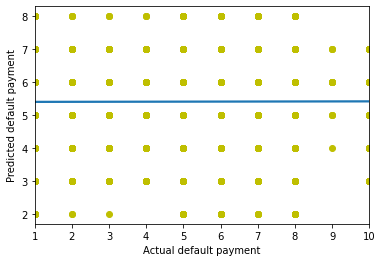

In [ ]:


print(confusion_matrix(test_y, test_predictions))
print(classification_report(test_y, test_predictions))
print("Accuracy (testing):", accuracy_score(test_y, test_predictions))

sb.regplot(test_y, test_predictions, scatter_kws={'alpha':1, 'color':'y'})
plt.xlabel('Actual default payment')
plt.ylabel('Predicted default payment')
plt.show()

In [ ]:
save_to = '/content/drive/MyDrive/bigo/clean_dataset.csv'
ddf.to_csv(save_to, index = False)